# Avaliação 2 - Gabriel Lima Novais 

Data Set Escolhido : Air Quality UCI

Site/Link : https://archive.ics.uci.edu/ml/datasets/Air+Quality#

### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. 
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 

Source : 

Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development

### Attribute Information:

0) Date	(DD/MM/YYYY)

1) Time	(HH.MM.SS) 

2) True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

3) PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	

4) True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5) True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 

6) PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	

7) True hourly averaged NOx concentration in ppb (reference analyzer) 

8) PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

9) True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	

10) PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	

11) PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

12) Temperature in Â°C	

13) Relative Humidity (%) 

14) AH Absolute Humidity 


## Importando pacotes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import decomposition
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

%matplotlib inline

Links de pacotes (documentation):

https://www.statsmodels.org/stable/about.html#module-statsmodels

https://scikit-learn.org/stable/

https://seaborn.pydata.org/

https://www.scipy.org/docs.html



## Importando a Base de Dados:

In [2]:
dbName = 'AirQualityUCI.xlsx'
db_raw= pd.read_excel(dbName)
db_raw.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

## Tratando a Base de Dados:

1) Verificando a quantidade de missing values e substituindo os mesmos pela interpolação das linhas acima e abaixo da base de dados : 

In [3]:
db_raw.describe() #antes dos missing values

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [4]:
db_raw[db_raw==-200]=np.nan
db_raw = db_raw.interpolate()

In [5]:
db_raw.describe() #depois da interpolação

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.130603  1102.932925   269.834349    10.178838     942.019562   
std       1.431736   218.201561    74.251999     7.503295     267.864854   
min       0.100000   647.250000     7.000000     0.149048     383.250000   
25%       1.100000   937.500000   275.000000     4.477145     736.000000   
50%       1.800000  1066.750000   275.000000     8.289085     910.333333   
75%       2.900000  1238.750000   275.000000    14.096486    1119.000000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    241.908464    832.634930   109.620033   1453.172887  1032.422456   
std     204.308147    255.708807    46.451523    343.201361   404.442611   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      96.000000    654.000000    76.000000   1227.000000   733.250000   
50%     180.000000    803.500000   104.827586   1459.500000   970.000000   
75%     326.000000    967.500000   136.400000   1668.250000  1293.000000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean     18.231754    49.189157     1.019621  
std       8.782368    17.194081     0.402203  
min      -1.900000     9.175000     0.184679  
25%      11.725000    35.800000     0.732280  
50%      17.575000    49.650000     0.989504  
75%      24.275001    62.250002     1.306671  
max      44.600000    88.725000     2.231036

2) Dividindo as bases em (GT) e (PTO8):

OBS: (GT) Refere-se à concentração média verdadeira horária do componente pelo analisador de referência, enquanto que (PT08) refere-se à resposta média do sensor por hora.

In [6]:
db_GT = db_raw[['Date','Time','CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)','T','RH','AH']]
db_PT08 = db_raw[['Date','Time','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']]

In [7]:
db_GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
Date        9357 non-null datetime64[ns]
Time        9357 non-null object
CO(GT)      9357 non-null float64
NMHC(GT)    9357 non-null float64
C6H6(GT)    9357 non-null float64
NOx(GT)     9357 non-null float64
NO2(GT)     9357 non-null float64
T           9357 non-null float64
RH          9357 non-null float64
AH          9357 non-null float64
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 731.1+ KB


In [8]:
db_PT08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
PT08.S1(CO)      9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 731.1+ KB


## Analisando os Dados:

Vamos analisar a correlação entre as variáveis e verificar graficamente.

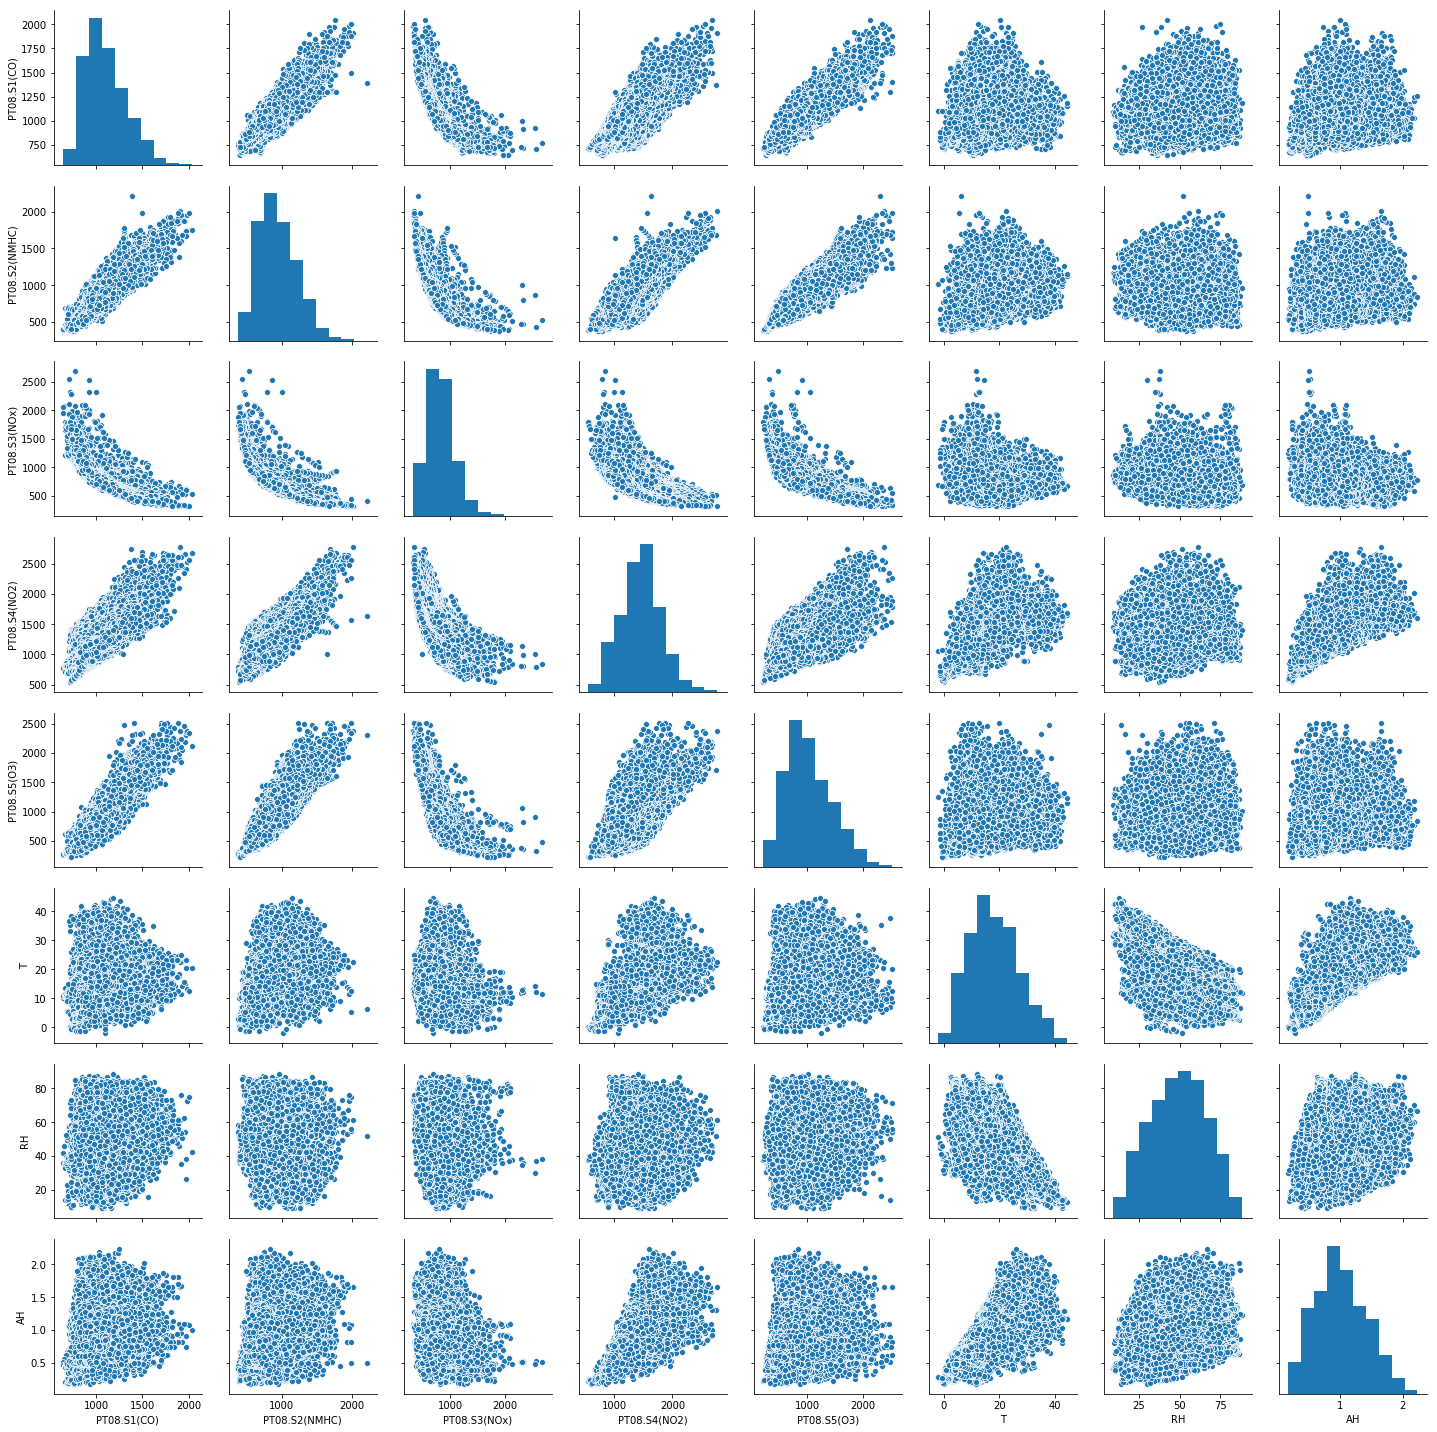

In [9]:
sns.pairplot(db_PT08)
plt.show()

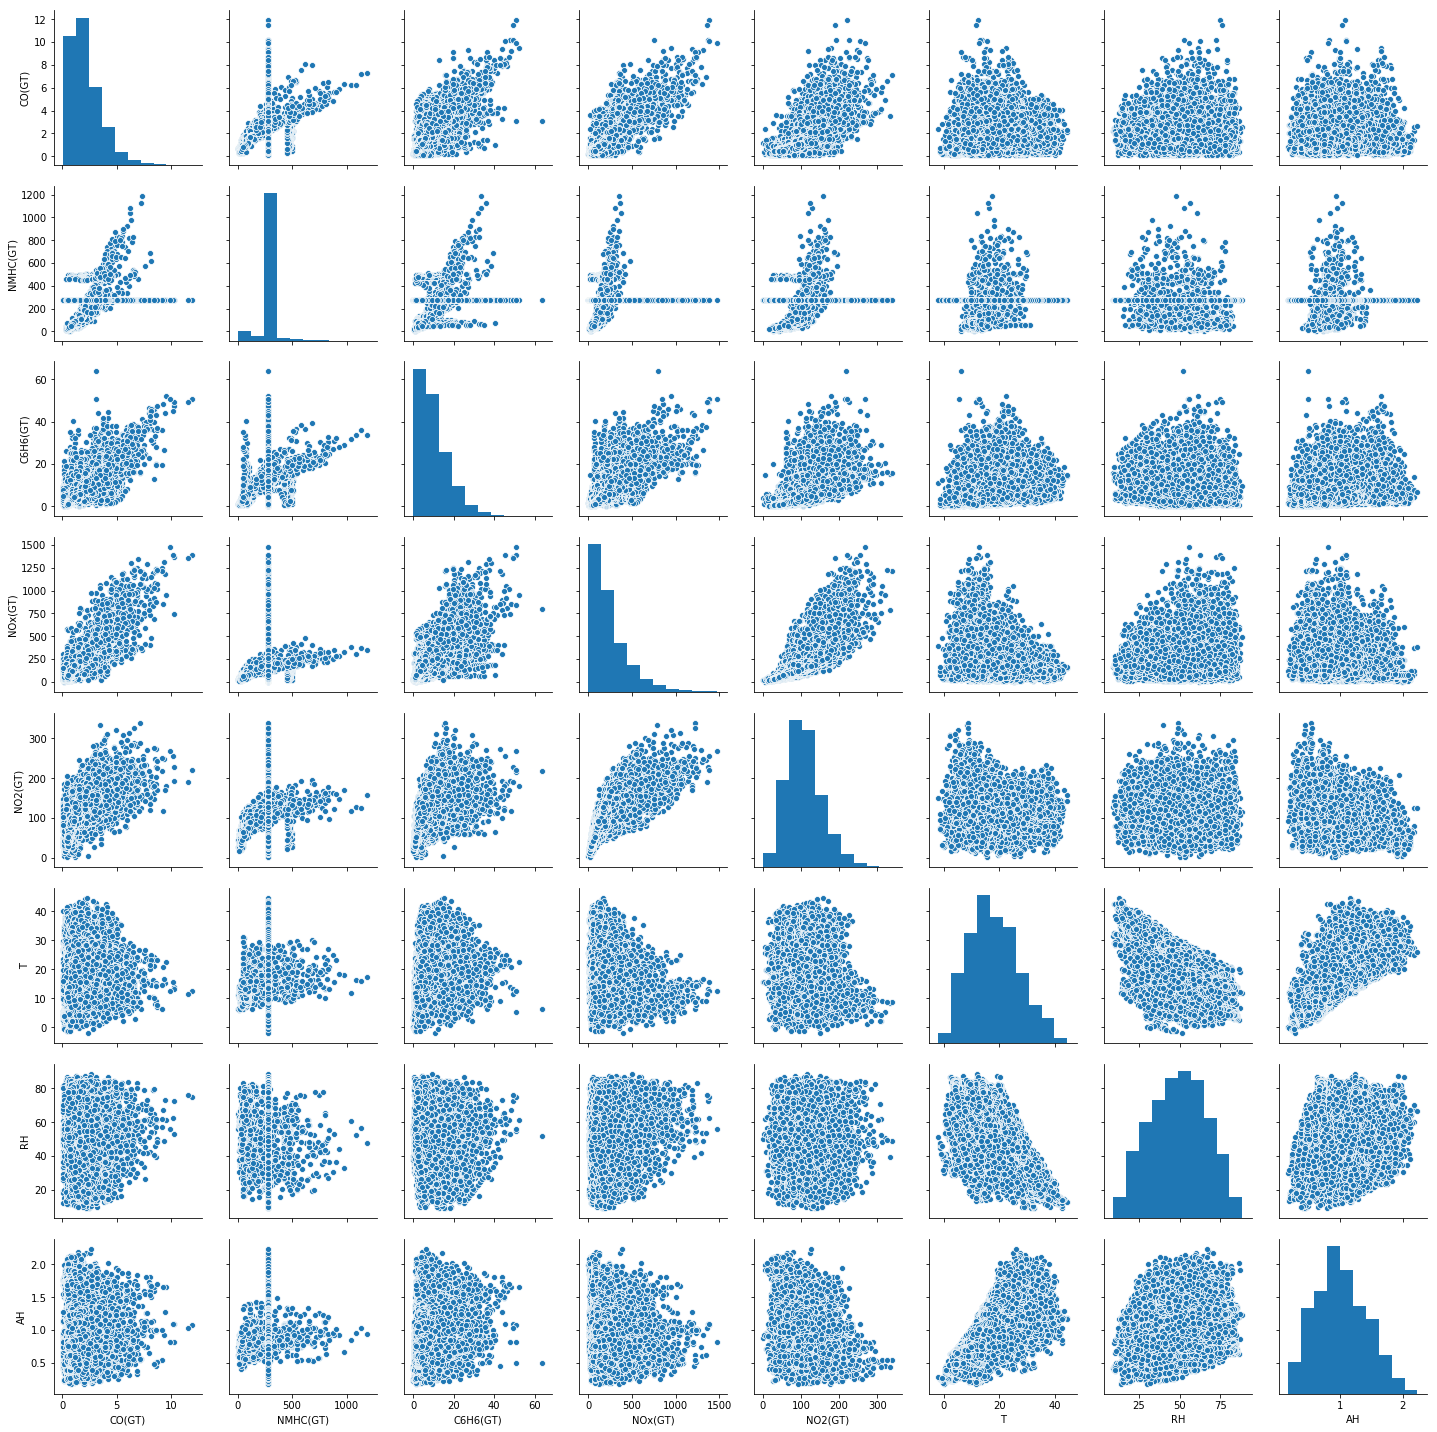

In [10]:
sns.pairplot(db_GT)
plt.show()

Como ambos dataframes (GT e PT08) são relativamente iguais, vamos focar apenas no que fornece dados provenientes diretamente do sensor (e provavelmente o mais preciso). É perceptivel a correlação entre determinadas variáveis, porém não sabemos quantificar tais valores. Desta forma, vamos calcular a matriz de covariância.

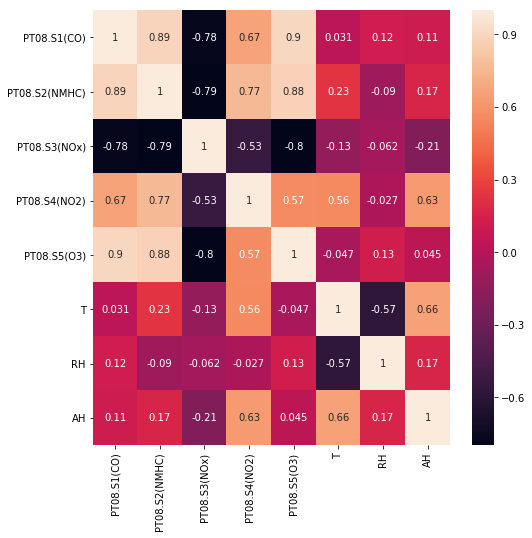

In [11]:
Var_Corr = db_PT08.corr()
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax = ax)
plt.show()

Conforme observamos os valores da matriz de covariância, verificamos que os gráficos iniciais estão de acordo com os valores contidos na matriz elemento a elemento. Logo, entendemos que as principais variáveis que explicam a Temperatura são aquelas que estão mais correlacionadas com ela, ou seja, AH, RH, NO2, NMHC. Vamos então verificar a distribuição de cada uma delas de maneira mais próxima.

Text(0.5, 1.0, 'NMHC - Distribuição')

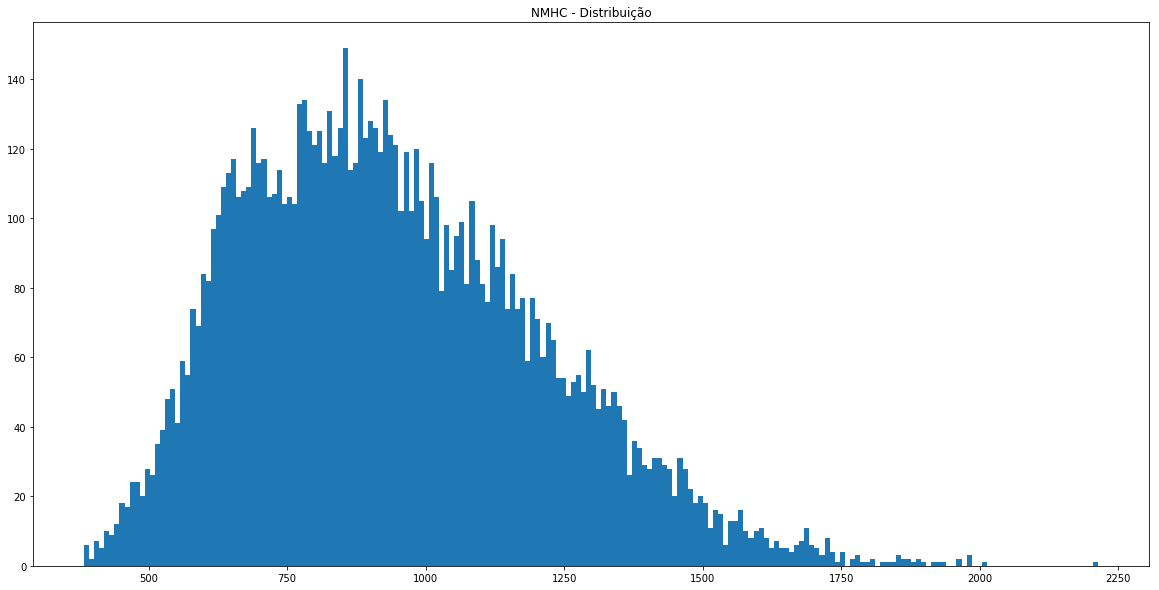

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(db_PT08['PT08.S2(NMHC)'], bins = 200)
plt.title("NMHC - Distribuição")

Text(0.5, 1.0, 'NO2 - Distribuição')

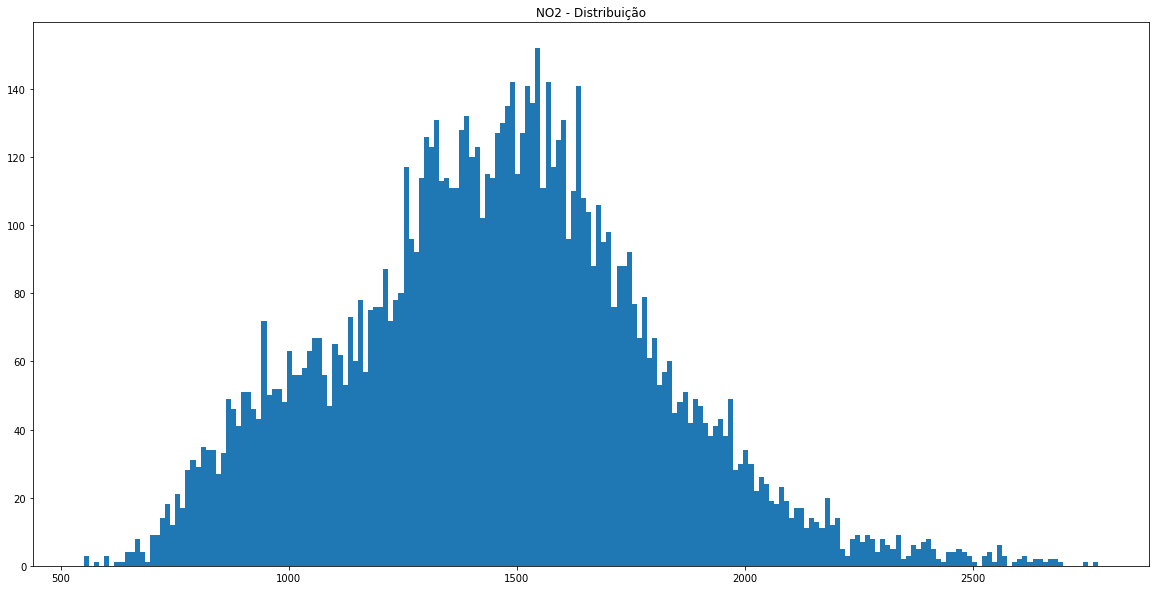

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(db_PT08['PT08.S4(NO2)'], bins = 200)
plt.title("NO2 - Distribuição")

Text(0.5, 1.0, 'T - Distribuição')

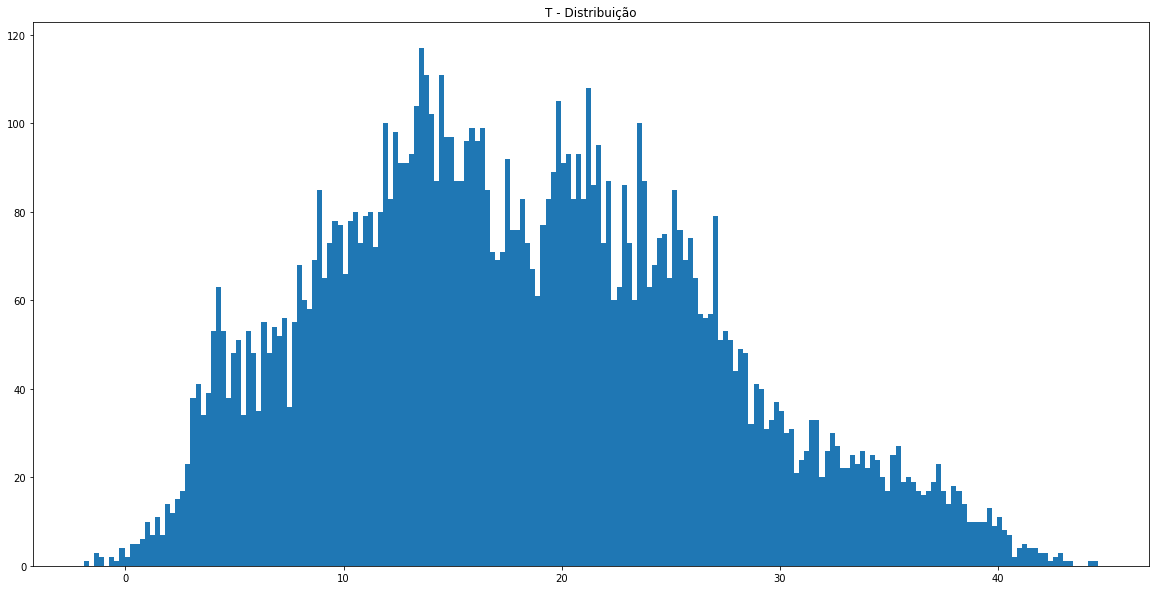

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(db_PT08['T'], bins = 200)
plt.title("T - Distribuição")

Text(0.5, 1.0, 'AH - Distribuição')

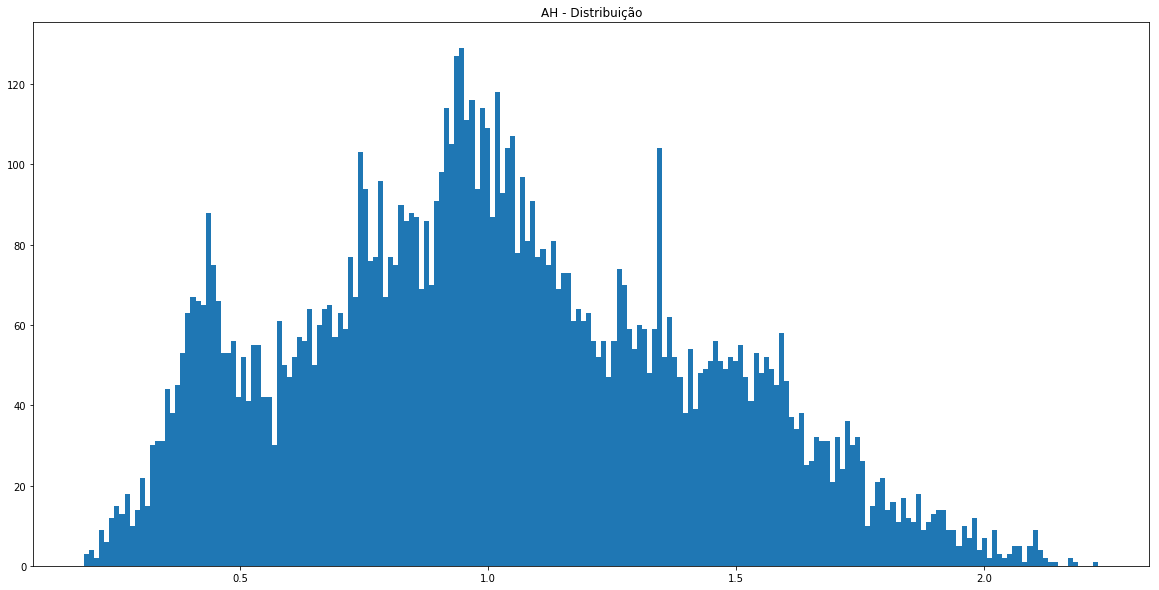

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(db_PT08['AH'], bins = 200)
plt.title("AH - Distribuição")

Text(0.5, 1.0, 'RH - Distribuição')

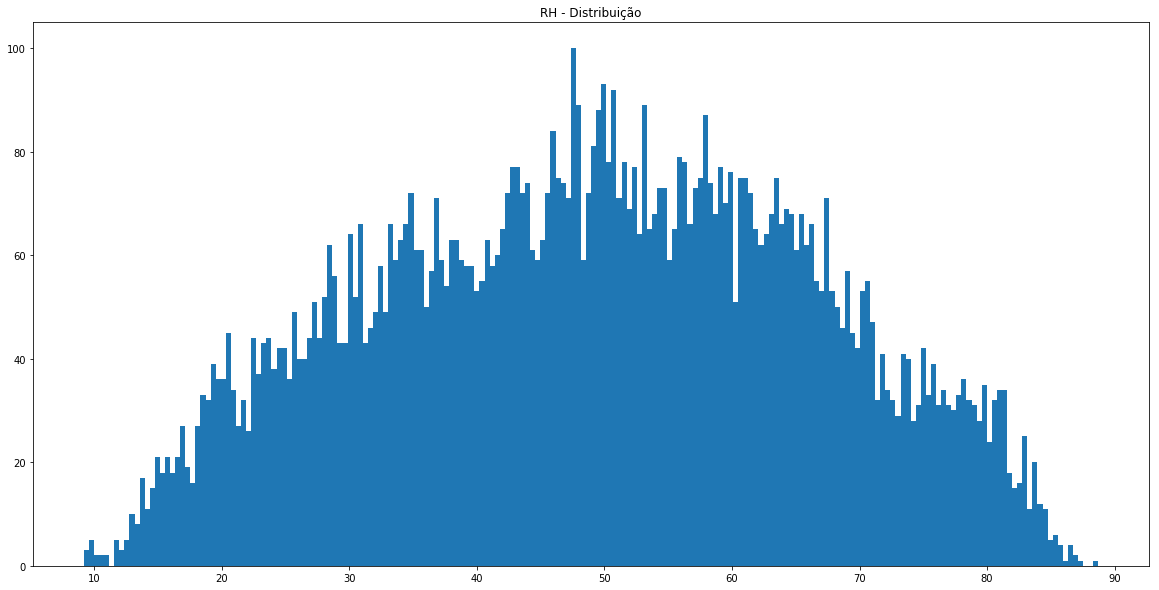

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
_ = plt.hist(db_PT08['RH'], bins = 200)
plt.title("RH - Distribuição")

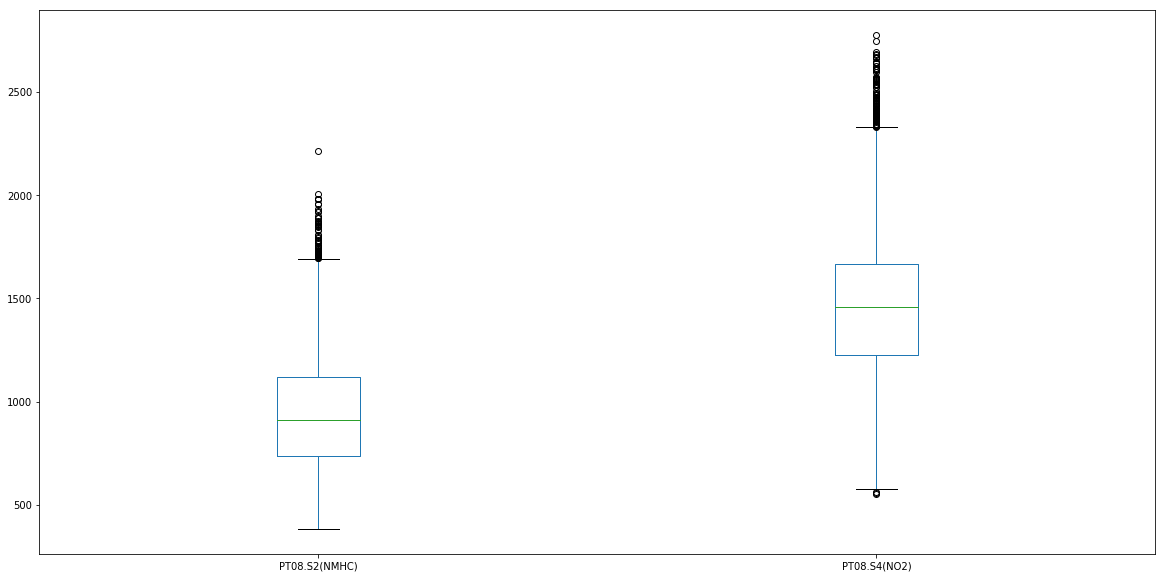

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
PT08 = db_raw[['PT08.S2(NMHC)','PT08.S4(NO2)']]
PT08.plot.box(ax=ax)

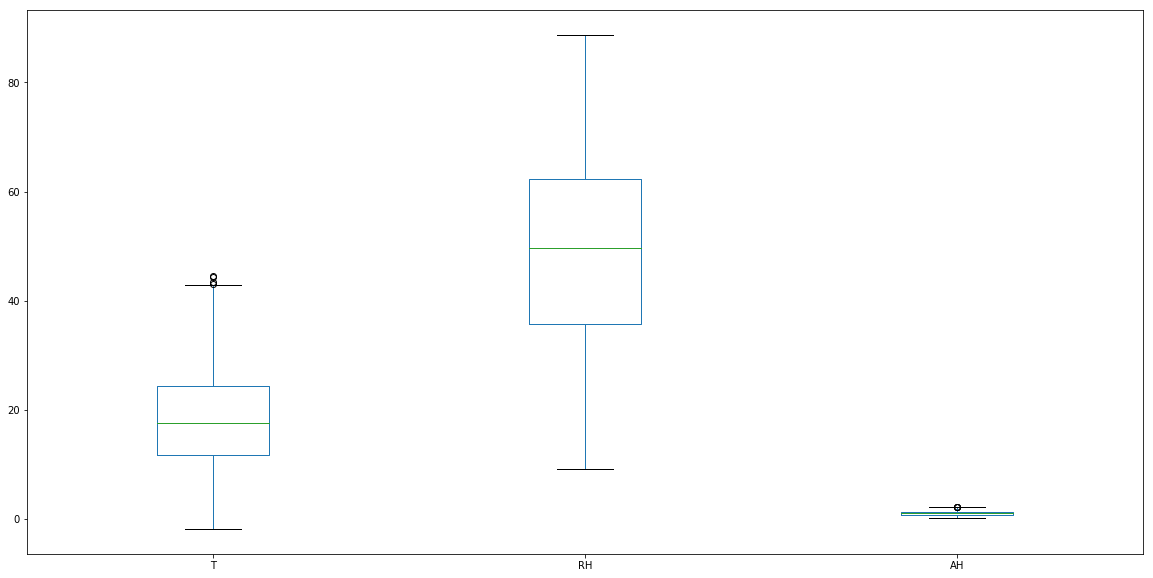

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
PT08 = db_raw[['T','RH','AH']]
PT08.plot.box(ax=ax)

Analisaremos agora a evolução dos dados quando agrupados sob uma média diária com respeito as horas da base de dados do PT08.

In [19]:
type(db_PT08['Time'][0])

datetime.time

In [20]:
type(db_PT08['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
dia = db_PT08['Date']
dia.head(10)

0   2004-03-10
1   2004-03-10
2   2004-03-10
3   2004-03-10
4   2004-03-10
5   2004-03-10
6   2004-03-11
7   2004-03-11
8   2004-03-11
9   2004-03-11
Name: Date, dtype: datetime64[ns]

In [22]:
hora = db_PT08['Time']
hora.head(10)

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
5    23:00:00
6    00:00:00
7    01:00:00
8    02:00:00
9    03:00:00
Name: Time, dtype: object

In [23]:
df = db_PT08.groupby('Date').mean() # Obtemos valores médios diários paras as variáveis
df.head(10)

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
Date                                                                 
2004-03-10  1316.500000     912.250000   1167.250000   1545.333333   
2004-03-11  1244.062500     851.802083   1277.187500   1522.697917   
2004-03-12  1281.562500    1008.229167   1101.718750   1627.218750   
2004-03-13  1330.555556     992.822917    993.159722   1595.621528   
2004-03-14  1360.927083     943.854167   1001.104167   1602.187500   
2004-03-15  1452.010417    1138.843750    845.562500   1888.489583   
2004-03-16  1339.621528    1061.763889    939.149306   1726.534722   
2004-03-17  1362.708333    1098.937500    930.427083   1741.000000   
2004-03-18  1352.569444    1072.517361    901.111111   1702.649306   
2004-03-19  1304.208333    1057.916667    913.177083   1745.343750   

            PT08.S5(O3)          T         RH        AH  
Date                                                     
2004-03-10  1096.041667  12.020833  54.883334  0.765626  
2004-03-11   885.031250   9.833333  64.069791  0.775768  
2004-03-12  1084.218750  11.292708  51.107292  0.663102  
2004-03-13  1245.781250  12.866319  51.530903  0.732294  
2004-03-14  1234.177083  16.016667  48.843750  0.849674  
2004-03-15  1439.041667  17.370833  50.320833  0.944025  
2004-03-16  1322.475694  18.627778  44.825000  0.871021  
2004-03-17  1405.677083  18.772917  41.165625  0.804920  
2004-03-18  1300.805556  17.760764  44.084722  0.826001  
2004-03-19  1095.708333  14.194792  57.904167  0.923965

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 2004-03-10 to 2005-04-04
Data columns (total 8 columns):
PT08.S1(CO)      391 non-null float64
PT08.S2(NMHC)    391 non-null float64
PT08.S3(NOx)     391 non-null float64
PT08.S4(NO2)     391 non-null float64
PT08.S5(O3)      391 non-null float64
T                391 non-null float64
RH               391 non-null float64
AH               391 non-null float64
dtypes: float64(8)
memory usage: 27.5 KB


In [25]:
df_selecionadas = df[['PT08.S2(NMHC)','PT08.S4(NO2)','T','RH','AH']]
df_selecionadas.head(10)

PT08.S2(NMHC)  PT08.S4(NO2)          T         RH        AH
Date                                                                   
2004-03-10     912.250000   1545.333333  12.020833  54.883334  0.765626
2004-03-11     851.802083   1522.697917   9.833333  64.069791  0.775768
2004-03-12    1008.229167   1627.218750  11.292708  51.107292  0.663102
2004-03-13     992.822917   1595.621528  12.866319  51.530903  0.732294
2004-03-14     943.854167   1602.187500  16.016667  48.843750  0.849674
2004-03-15    1138.843750   1888.489583  17.370833  50.320833  0.944025
2004-03-16    1061.763889   1726.534722  18.627778  44.825000  0.871021
2004-03-17    1098.937500   1741.000000  18.772917  41.165625  0.804920
2004-03-18    1072.517361   1702.649306  17.760764  44.084722  0.826001
2004-03-19    1057.916667   1745.343750  14.194792  57.904167  0.923965

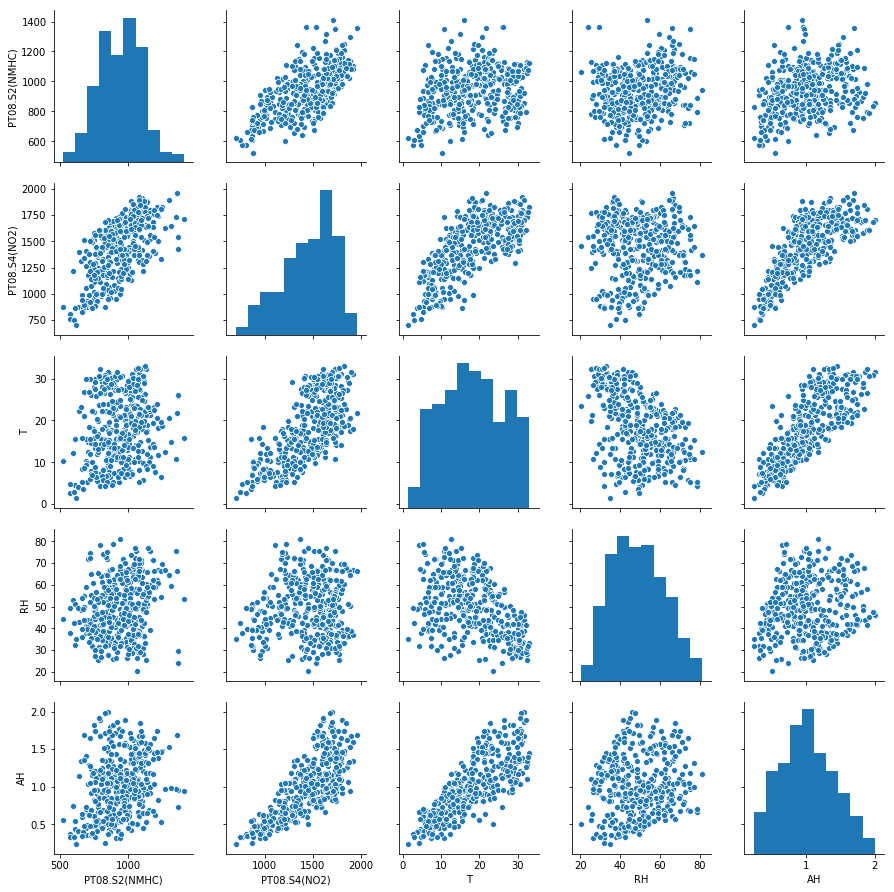

In [26]:
sns.pairplot(df_selecionadas)
plt.show()

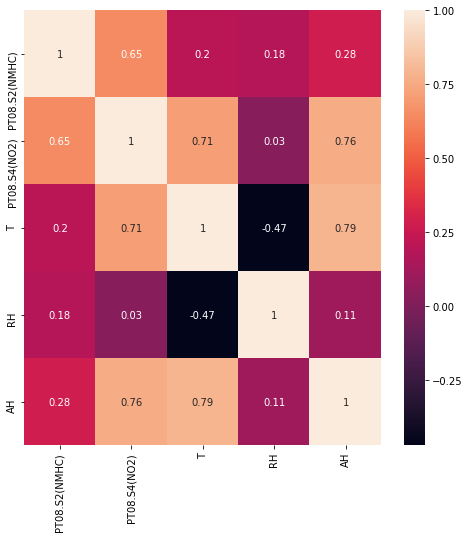

In [27]:
Var_Corr = df_selecionadas.corr()
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax = ax)
plt.show()

A partir das quatro variáveis anteriores, temos bastante dados para explicar a temperatura.

Vejamos a evolução das 4 séries diárias comparadas com as séries por hora.

In [28]:
def plot_c(serie_diaria, serie_hora):
    ratio = (len(serie_hora))/len(serie_diaria)
    extension = np.zeros(len(serie_hora))
    for index in range(len(serie_diaria)):
        extension[int(np.floor(ratio*index))] = serie_diaria[index]
    extension = [np.nan if x == 0 else x for x in extension]
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(serie_hora, alpha = 0.5)
    plt.scatter(np.arange(len(extension)), extension, c = 'red')

    plt.legend()

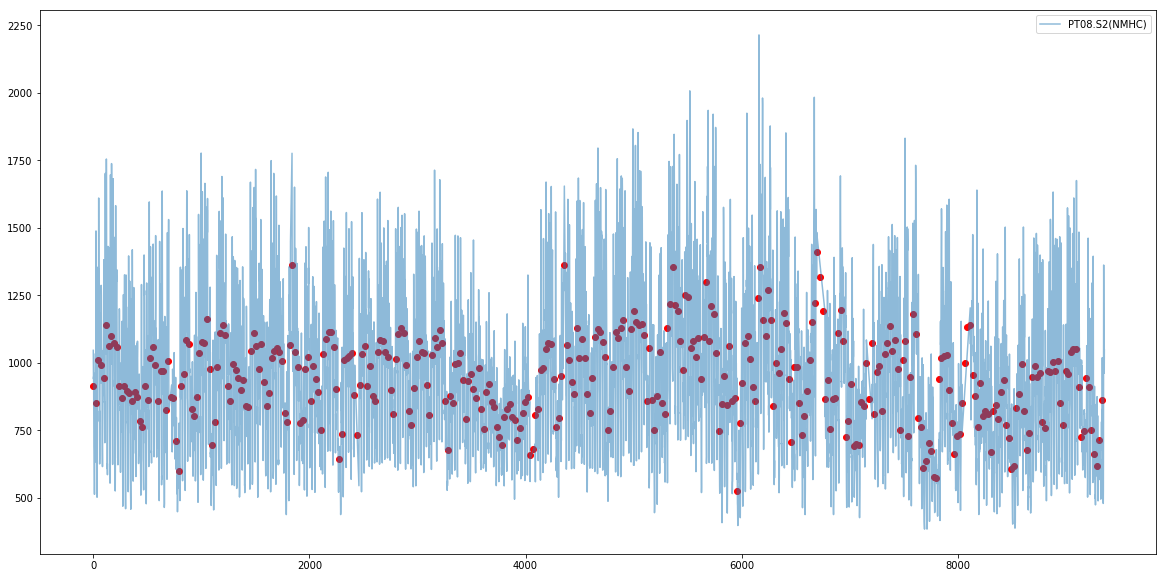

In [29]:
hora = db_PT08['PT08.S2(NMHC)']
dia = df_selecionadas['PT08.S2(NMHC)']
plot_c(dia,hora)

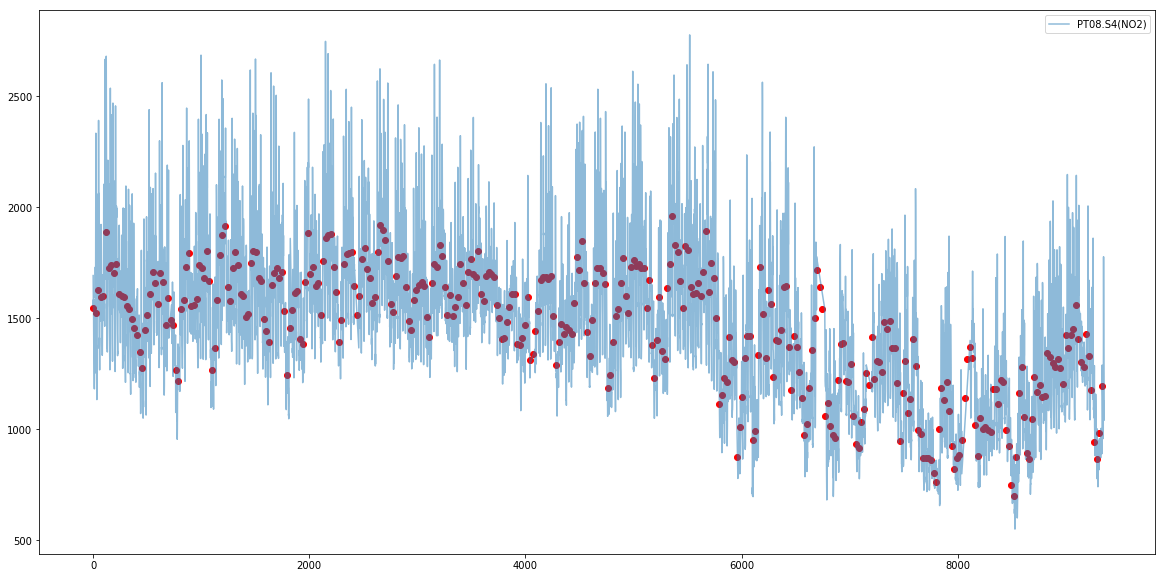

In [30]:
hora = db_PT08['PT08.S4(NO2)']
dia = df_selecionadas['PT08.S4(NO2)']
plot_c(dia,hora)

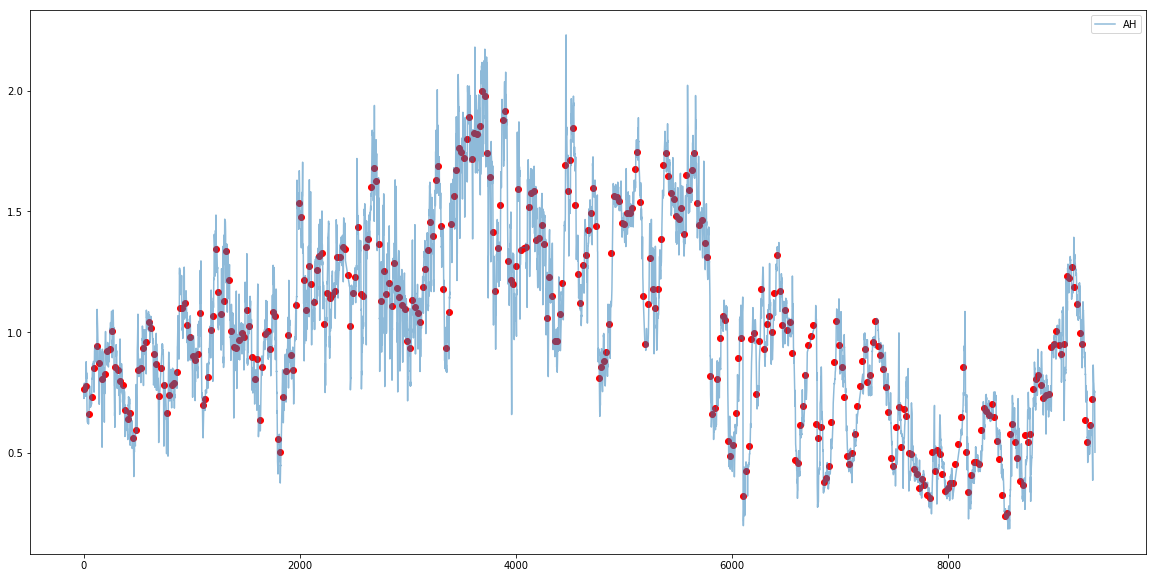

In [31]:
hora = db_PT08['AH']
dia = df_selecionadas['AH']
plot_c(dia,hora)

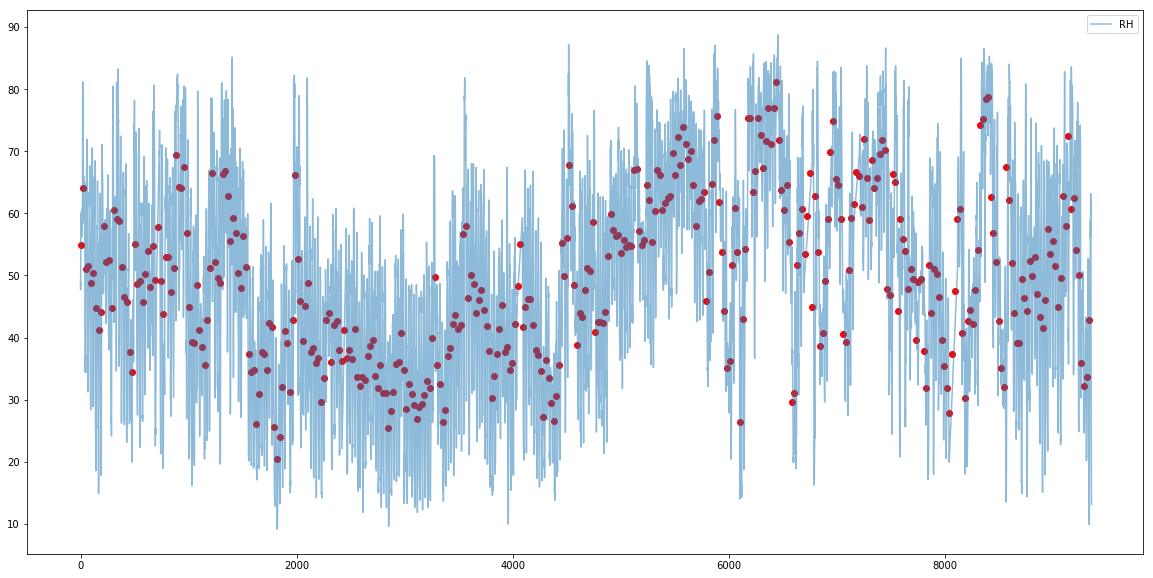

In [32]:
hora = db_PT08['RH']
dia = df_selecionadas['RH']
plot_c(dia,hora)

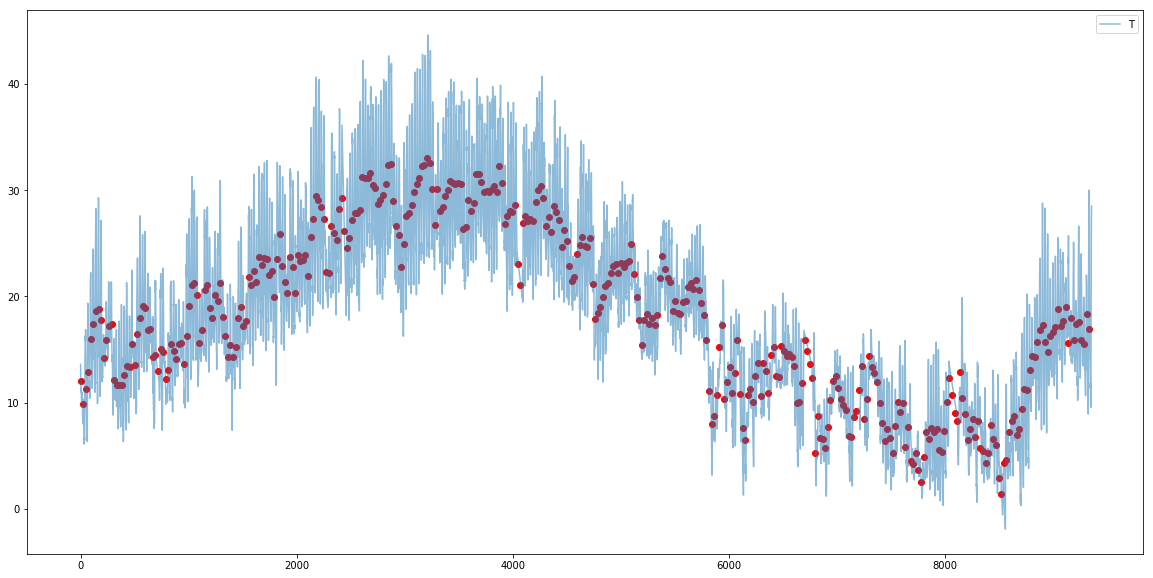

In [33]:
hora = db_PT08['T']
dia = df_selecionadas['T']
plot_c(dia,hora)

Logo, podemos perceber que as curvas com a mudança de frequência ficam mais suavizadas por conta das médias diárias. Na medida em que utilizamos as médias diárias em vez dos valores por hora, podemos estar perdendo informção ( de 9357 observações para 391), portanto ficou decidido que para as análises posteriores utilizar-se-iam dados com frequência por hora. Prossigamos para a análise da Temperatura como série temporal (observação de tendência, estacionariedade e resíduos)

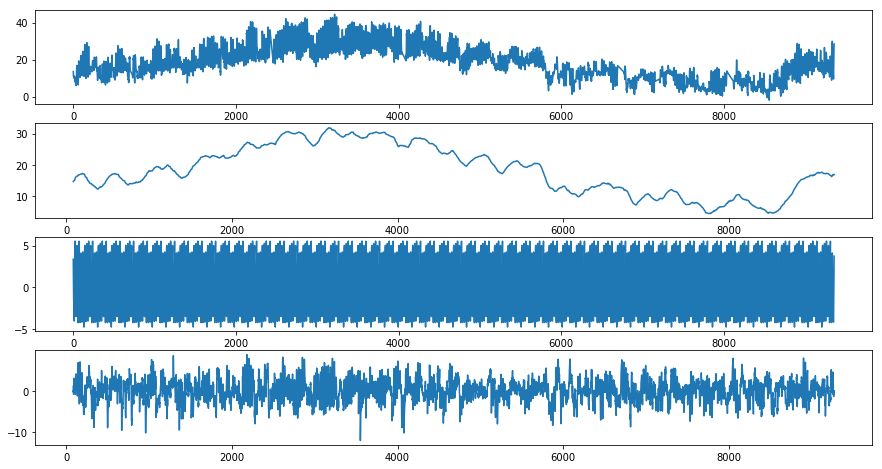

In [34]:
decompfreq = 168 # 168 = 24horas*7dias_da_semana/1hora, estamos tentando observar padrões de sazonalidade, 
                 # tendência e ciclos a cada semana. 
    
res = sm.tsa.seasonal_decompose(db_PT08['T'],
                                freq=decompfreq,
                                model='additive')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)


Aparentemente, a série é estacionária, pois a tendência tem valores em torno da média e a variância aparenta ser constante. Façamos o teste de raiz unitária.

In [35]:
result = adfuller(db_PT08['T'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.090839
p-value: 0.027239
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Logo, concluimos que a série possui evidência de ser estacionária.

Para usar o PCA, vamos colocar como variável dependente a temperatura e as demais variáveis como independentes para analisar possíveis influências de concentração de gases sobre a temperatura. A intenção dessa divisão é que possamos aplicar PCA e identificar quais variáveis melhor explicam a matriz de covariância.

In [36]:
# Isolando as variáveis dependente e independentes
X = db_PT08.drop(['Date', 'Time', 'T'], axis = 1).values
y = db_PT08['T'].values

Agora, vamos aplicar PCA  e descobrir quais variáveis detêm maior capacidade de explicar a matriz de covariância.

In [37]:
pca = decomposition.PCA(n_components = None)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

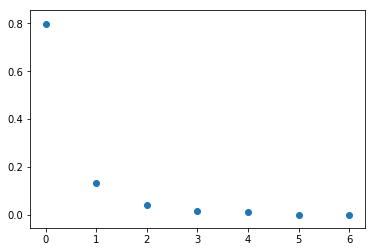

In [38]:
plt.scatter(np.arange(X.shape[1]), pca.explained_variance_ratio_)

In [39]:
pca.components_

array([[ 3.35226287e-01,  4.21448627e-01, -3.55651630e-01,
         4.39924010e-01,  6.24484551e-01,  1.48106593e-03,
         1.65056970e-04],
       [ 8.42883349e-02, -5.27241216e-02, -2.29547160e-01,
        -8.52002544e-01,  4.59781906e-01,  1.07184190e-02,
        -1.06070381e-03],
       [ 1.23922849e-01, -1.02588142e-02,  8.89466145e-01,
         1.05653009e-02,  4.39494293e-01,  1.09732795e-02,
        -7.67119248e-04],
       [ 3.88757269e-01,  7.48027823e-01,  1.66608051e-01,
        -2.80702746e-01, -4.20701796e-01, -7.60011413e-02,
        -1.92678316e-03],
       [-8.43871751e-01,  5.00116385e-01,  4.26706843e-02,
        -3.72683153e-02,  1.66231554e-01, -8.31941329e-02,
        -4.01325911e-04],
       [-4.37002597e-02,  9.91595242e-02,  9.50378266e-03,
        -1.61800674e-02, -2.90081809e-02,  9.93504749e-01,
         3.52112051e-03],
       [ 6.93400612e-04,  1.15949744e-03,  8.02233534e-04,
        -1.46708133e-03,  8.00153358e-05, -3.65856616e-03,
         9.9999099

CONCLUSÃO : Observando os pesos das combinações da primeira componente (que representa 80% das explicações do modelo) sabemos que a variável que apresenta maior peso dentro da componente é aquela relacionada ao NO2, o que é interessante, pois a intuição nos leva a acreditar que o mesmo seria direcionado ao CO.